# Guillaume Payeur (260929164)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
plt.rcParams.update({"text.usetex": True})
import pandas as pd
import random

# Q1

First loading the "random" points generated with C.

In [2]:
f = pd.read_csv("rand_points.txt", sep=" ", header=None)
xdata = np.array(f[0])
ydata = np.array(f[1])
zdata = np.array(f[2])

Now I show what it the points look like for some random viewing angle

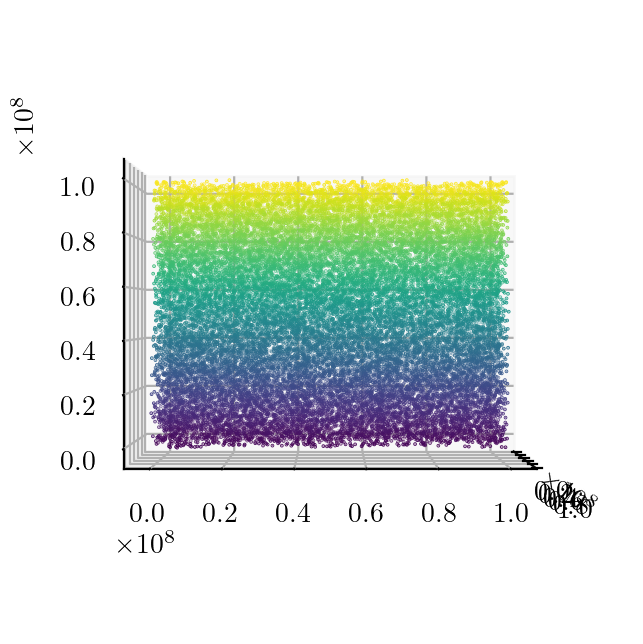

In [3]:
ax = plt.axes(projection='3d')
ax.view_init(0, 0)
ax.scatter3D(xdata, ydata, zdata, c=zdata, s=0.1)
plt.show()

Now I show what the points look like when the viewing angle is parallel to the planes on which the points live

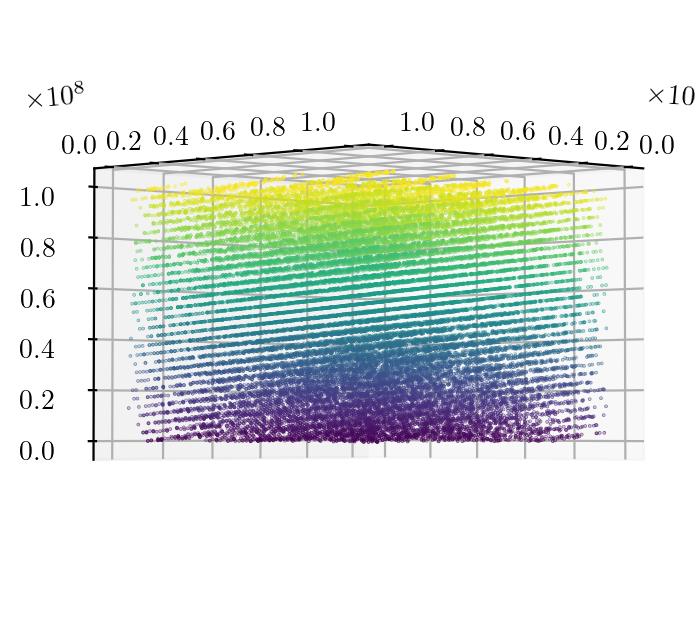

In [4]:
ax = plt.axes(projection='3d')
ax.view_init(-2, 45)
ax.scatter3D(xdata, ydata, zdata, c=zdata, s=0.1)
plt.show()

This way the planes are visible. Now I repeat this procedure using Python's random.randint

In [5]:
# Making vector of random integers between 0 and 2^31
vec=np.empty(300000000,dtype='int32')
for i in range(300000000):
    vec[i] = random.randint(0, 2**31)
# Reshaping the vector into 3d points
vec = np.reshape(vec,(3,100000000))
# Keeping only points with 0 < x,y,z < 1e8
maxval=1e8
vmax=np.max(vec,axis=0)
vv2=vec[:,vmax<maxval]
print(vv2.shape)

xdata = vv2[0]
ydata = vv2[1]
zdata = vv2[2]

(3, 10070)


Plotting the points with a random viewing angle

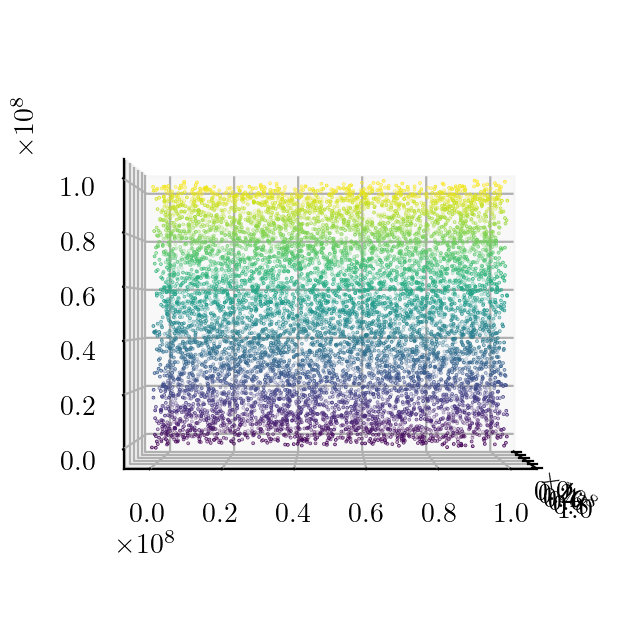

In [6]:
ax = plt.axes(projection='3d')
ax.view_init(0, 0)
ax.scatter3D(xdata, ydata, zdata, c=zdata, s=0.1)
plt.show()

I see no plane here, and searching many viewing angles using an interactive plot, I cannot find any plane, or any other feature suggesting that the numbers are not really random.

I wasn't able to load the C library on my machine.

# Q2

The distributions that work as bounding distributions are the Power law and the Lorentzian. The reason is that these ones decays slower than an Exponential as $x \to \infty$. Meanwhile the Gaussian distribution decays faster than an exponential as $x \to \infty$. Therefore, the Gaussian will necessarily be below the Exponential for some values of $x$, so isn't suitable.

I will generate samples from the exponential distribution with PDF
\begin{align}
    P(x) = e^{-x}
\end{align}
My most efficient bounding function is 
\begin{align}
    f(x) = \frac{1}{1+x^2}
\end{align}
First I plot the exponential distribution and the bounding function

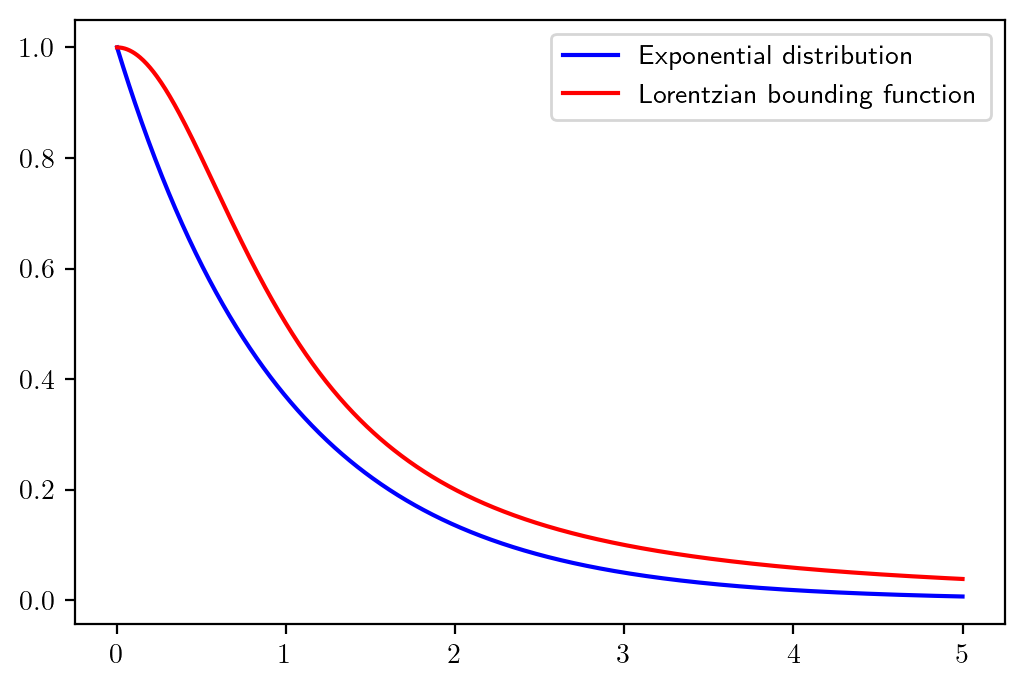

In [7]:
x = np.linspace(0,5,1000)
exponential = np.exp(-x)
lorentzian = 1/(1+x**2)
plt.plot(x,exponential,label='Exponential distribution',color='blue')
plt.plot(x,lorentzian,label='Lorentzian bounding function',color='red')
plt.legend(frameon=True)

Now I generate samples from the Lorenztian and accept/reject them to get samples from the Exponential

In [8]:
# Lorentzian distribution
def lorentzian(x):
    return 1/(1+x**2)

# Exponential bounding function
def exponential(x):
    return np.exp(-x)

# Function to generate samples from exponential distribution
def gen_exp_samples(n):
    # Getting lorentzian samples with uniform distribution over y component
    samples_lorentzian_x = np.random.standard_cauchy(n)
    samples_lorentzian_x = samples_lorentzian_x[samples_lorentzian_x>0]
    samples_lorentzian_y = np.random.rand(samples_lorentzian_x.shape[0])*lorentzian(samples_lorentzian_x)
    # Accepting/Rejecting samples
    samples_exp = samples_lorentzian_x[samples_lorentzian_y<exponential(samples_lorentzian_x)]
    # Printing ratio of accepted samples
    print(samples_exp.shape[0]/n)
    # Removing samples with x>5 just for plotting purposes
    samples_exp = samples_exp[samples_exp<5]
    return samples_exp

Now making a histogram with the exponential samples. I print the ratio of accepted samples

0.317789


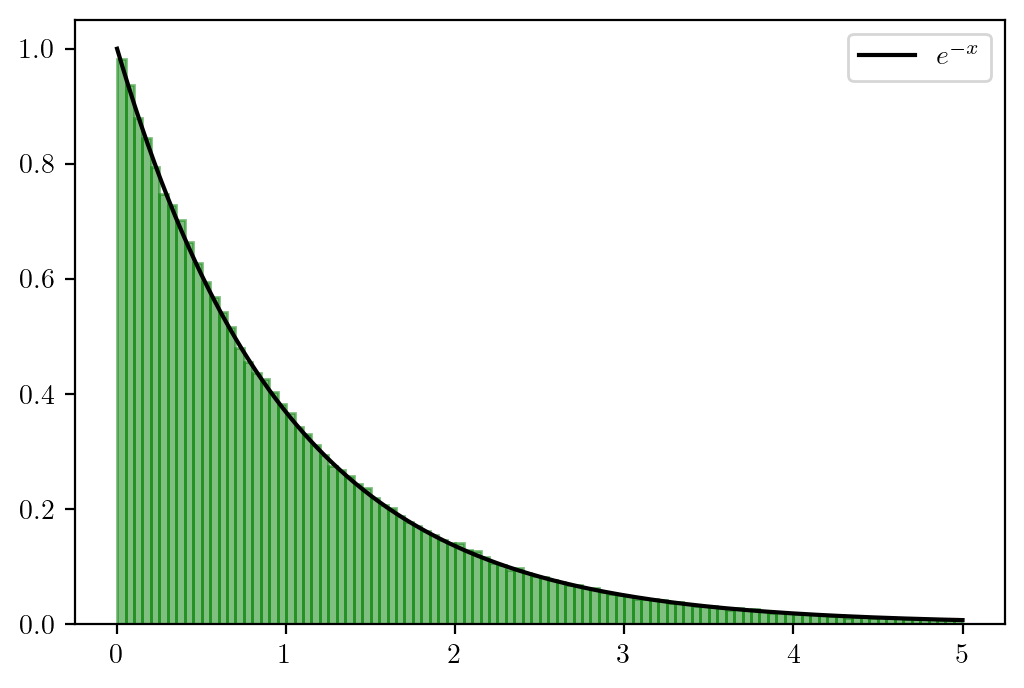

In [9]:
samples = gen_exp_samples(1000000)
plt.hist(samples,density=True,bins=100,color='green',alpha=0.5,histtype='bar', ec='green')
x = np.linspace(0,5,1000)
plt.plot(x,exponential(x),color='black',label='$e^{-x}$')
plt.legend(frameon=True)

So the efficiency of this model is 32%. Considering that half of the samples are thrown away due to having negative $x$, it's not so bad.

# Q3

First I make a plot of the acceptance region

0.7357588602357744


C:\Users\Guill\AppData\Local\Temp\ipykernel_284\1203540017.py:2: RuntimeWarning: divide by zero encountered in log
  y = np.log(x**2)*(-x)
C:\Users\Guill\AppData\Local\Temp\ipykernel_284\1203540017.py:2: RuntimeWarning: invalid value encountered in multiply
  y = np.log(x**2)*(-x)


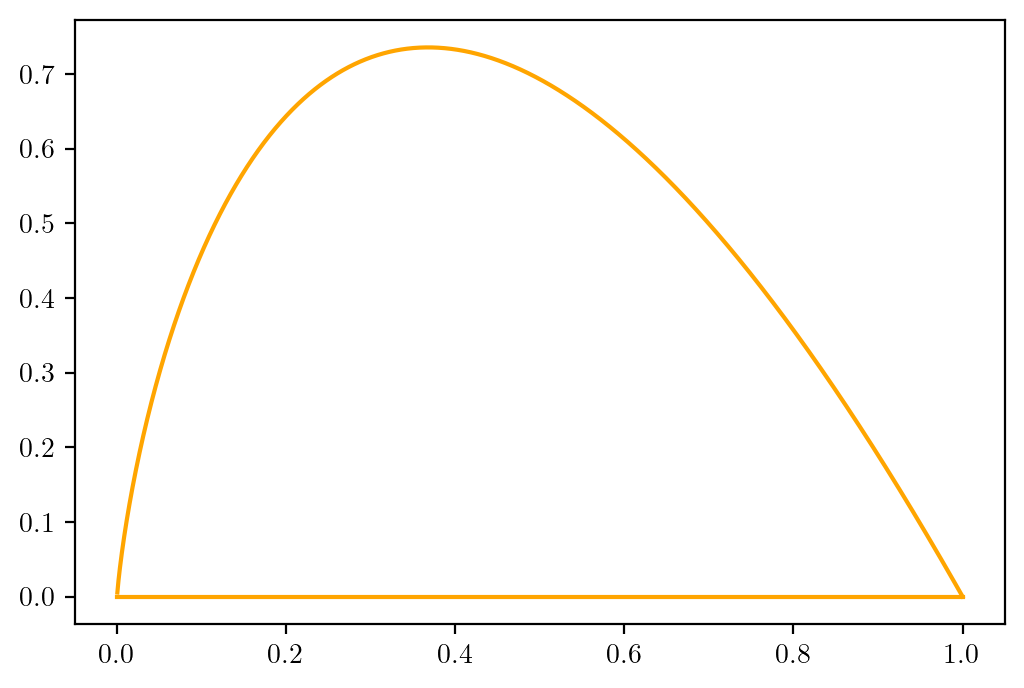

In [10]:
x = np.linspace(0,1,3000)
y = np.log(x**2)*(-x)
plt.plot(x,y,color='orange')
plt.plot([0,1],[0,0],color='orange')
print(np.nanmax(y))

In [11]:
# Exponential distribution
def exponential(x):
    return np.exp(-x)

# Drawing samples from the box
def sample_exponential(n):
    samples_box = np.random.rand(2,n)
    samples_box[1,:] = samples_box[1,:]*0.73
    # Accepting/Rejecting the samples depending on whether they are inside the region plotted above
    samples_exponential = samples_box[:,samples_box[1,:]<np.log(samples_box[0,:]**2)*(-samples_box[0,:])]
    samples_exponential = samples_exponential[1,:]/samples_exponential[0,:]
    # Printing ratio of accepted samples
    print(samples_exponential.shape[0]/n)
    # Removing samples with x>5 for plotting purposes
    samples_exponential = samples_exponential[samples_exponential < 5]
    return samples_exponential

0.684199


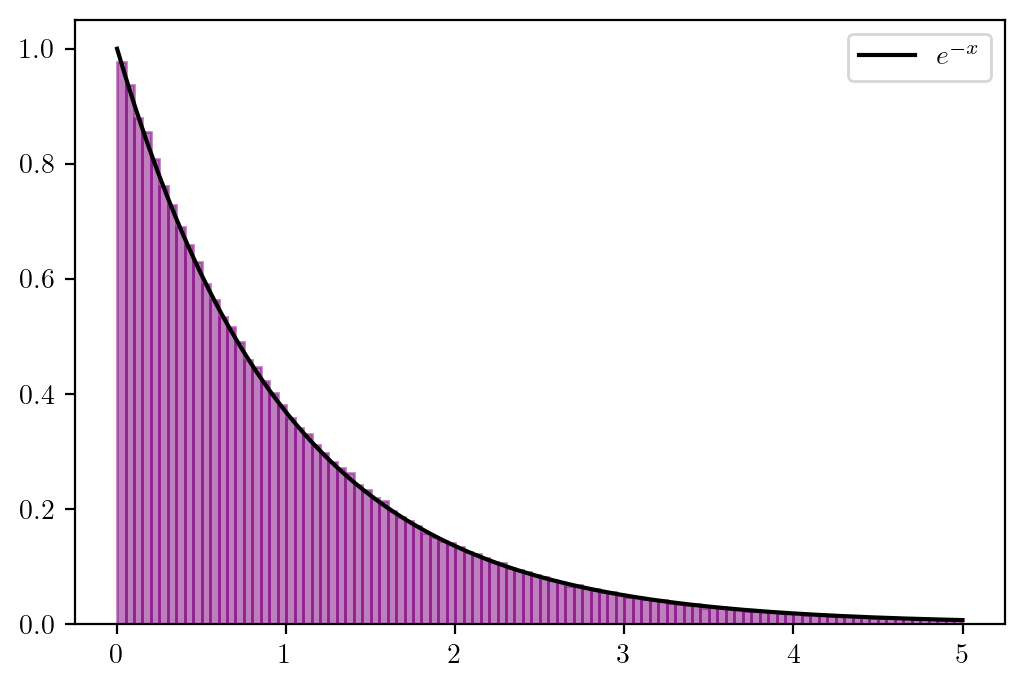

In [12]:
samples = sample_exponential(1000000)
plt.hist(samples,density=True,bins=100,color='purple',alpha=0.5,histtype='bar', ec='purple')
x = np.linspace(0,5,1000)
plt.plot(x,exponential(x),color='black',label='$e^{-x}$')
plt.legend(frameon=True)

The histogram matches expectations again, and the efficiency is 68%.